In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.5
1.4.2
0.11.2


In [3]:
df = pd.read_csv("SalaryData.csv.")

In [4]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
df.tail()

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  40 
no. of columns:  3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [8]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


# PROBLEM 1

##  State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### Hypothesis for One way ANOVA(Education)

Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.

### Hypothesis for One way ANOVA(Occupation)

Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.

##  Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
n=df.shape[0]*df.shape[1]
k=df.shape[1]

In [10]:
dfb=k-1
print('Degree of Freedom between groups',dfb)
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 2
Degree of Freedom within groups 117


In [11]:
formula = 'Salary ~ Education'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


### The above anova table shows values for education with respect to the variable salary. Here the p-value=1.257709e-08  is less than the significance level (alpha = 0.05). so we can reject the null hypothesis and conclude that there is a significant difference in the mean salaries for at least one category of education.

##  Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [12]:
formula = 'Salary ~ Occupation'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


### The above anova table shows values for occupation with respect to the variable salary. Here the p-value=0.458508 is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis (i.e. we accept H0) and conclude that there is no significant difference in the mean salaries across the 4 categories of occupation.

##  If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result. 

To find out which category means are different we can perform the Tukey Honest Significant Difference test.

In [13]:
from statsmodels.stats.multicomp import MultiComparison

In [14]:
compare = MultiComparison(df['Salary'], df['Education'])
result = compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7537.2745  79010.8589   True
 Bachelors    HS-grad  -90114.1556    0.0 -132039.7353 -48188.5758   True
 Doctorate    HS-grad -133388.2222    0.0 -174819.5736 -91956.8709   True
-------------------------------------------------------------------------


The above table shows the which pair of education category means are different.

In [15]:
compare = MultiComparison(df['Salary'], df['Occupation'])
result = compare.tukeyhsd()
print(result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4133  -40414.1768 151800.7768  False
    Adm-clerical   Prof-specialty  27528.8538 0.7478  -46276.6569 101334.3646  False
    Adm-clerical            Sales  16180.1167 0.9374  -58950.5539  91310.7873  False
 Exec-managerial   Prof-specialty -28164.4462 0.8439 -120501.5231  64172.6308  False
 Exec-managerial            Sales -39513.1833  0.668 -132912.8623  53886.4956  False
  Prof-specialty            Sales -11348.7372  0.972  -81591.9315  58894.4572  False
------------------------------------------------------------------------------------


The above table shows all the means of occupation category are same.Turkey test further concluded there is a no significant difference between all means of the occupation category. 

# Problem 1B:

##  What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

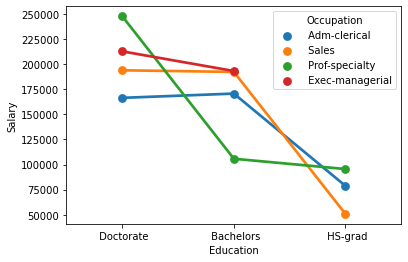

In [16]:
sns.pointplot(x = 'Education', y = 'Salary', hue= 'Occupation', data = df, ci = None);

##  Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [17]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


# Problem 2:

##  Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [18]:
df1 = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [19]:
df1.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [21]:
df1.shape

(777, 18)

In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [23]:
df1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [24]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


There are no null values in the dataset¶

In [25]:
sns.set_theme(style="darkgrid")

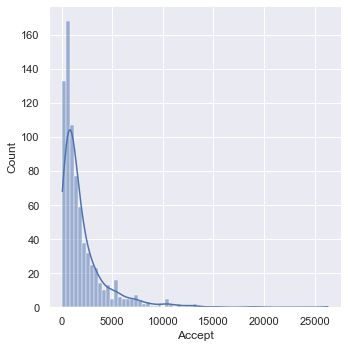

In [26]:
sns.displot(data=df1, x="Accept", kde=True)

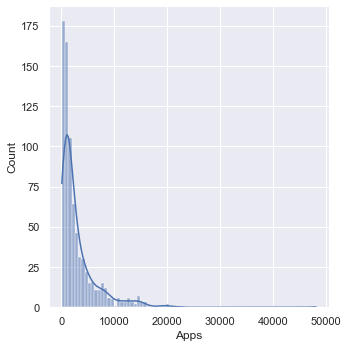

In [27]:
sns.displot(data=df1, x="Apps", kde=True)

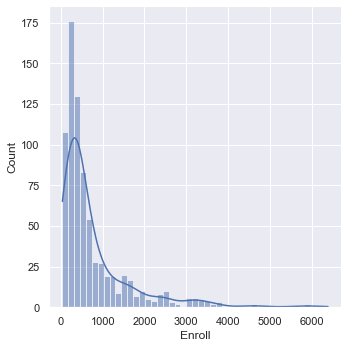

In [28]:
sns.displot(data=df1, x="Enroll", kde=True)

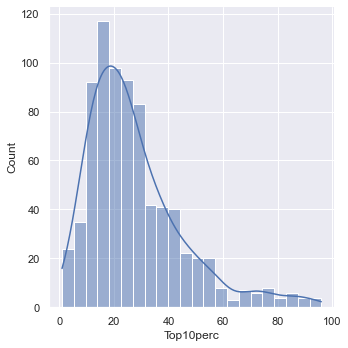

In [29]:
sns.displot(data=df1, x="Top10perc", kde=True)

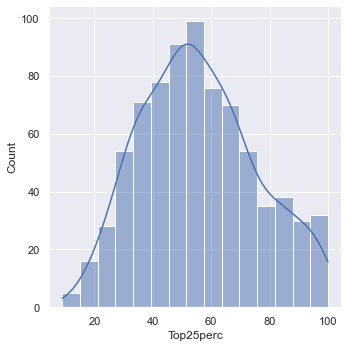

In [30]:
sns.displot(data=df1, x="Top25perc", kde=True)

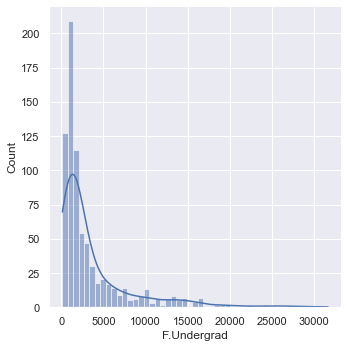

In [31]:
sns.displot(data=df1, x="F.Undergrad", kde=True)

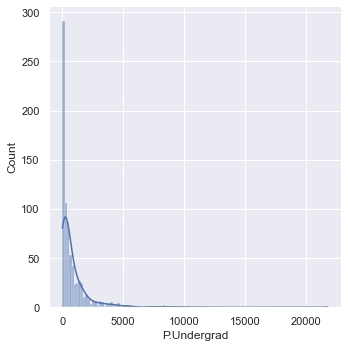

In [32]:
sns.displot(data=df1, x="P.Undergrad", kde=True)

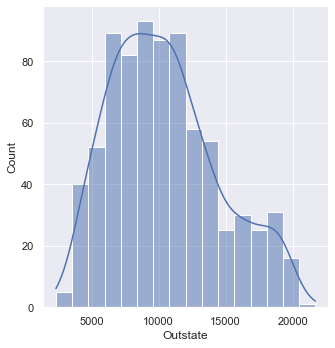

In [33]:
sns.displot(data=df1, x="Outstate", kde=True)

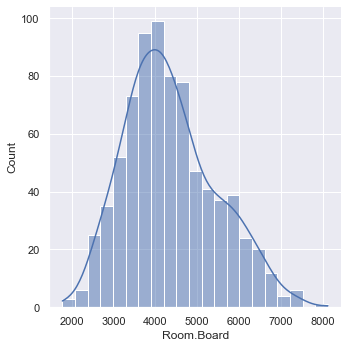

In [34]:
sns.displot(data=df1, x="Room.Board", kde=True)

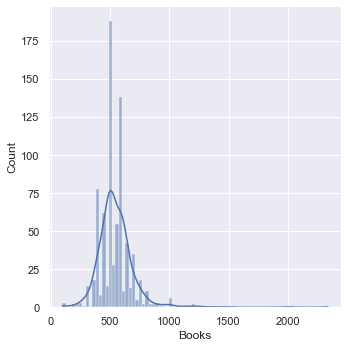

In [35]:
sns.displot(data=df1, x="Books", kde=True)  

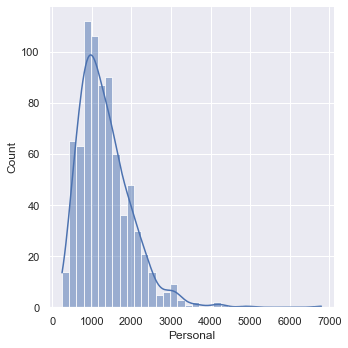

In [36]:
sns.displot(data=df1, x="Personal", kde=True)

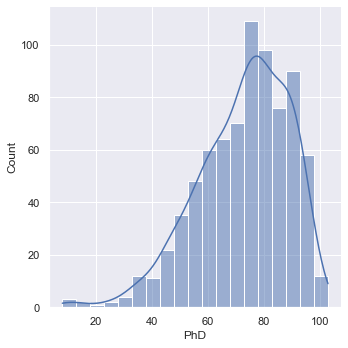

In [37]:
sns.displot(data=df1, x="PhD", kde=True)

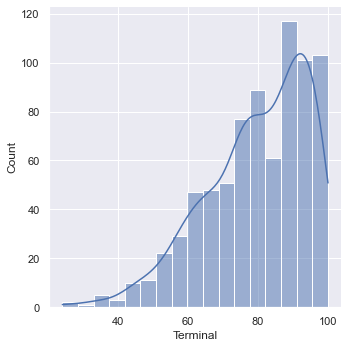

In [38]:
sns.displot(data=df1, x="Terminal", kde=True) 

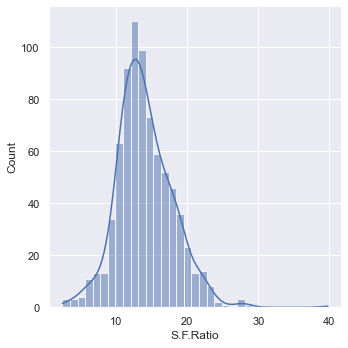

In [39]:
sns.displot(data=df1, x="S.F.Ratio", kde=True)

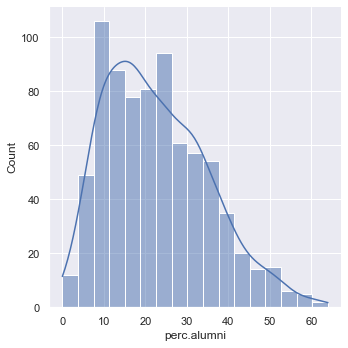

In [40]:
sns.displot(data=df1, x="perc.alumni", kde=True)   

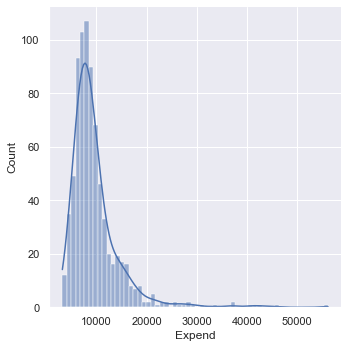

In [41]:
sns.displot(data=df1, x="Expend", kde=True)  

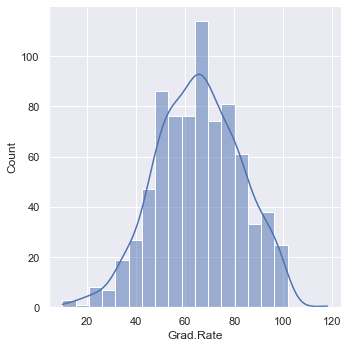

In [42]:
sns.displot(data=df1, x="Grad.Rate", kde=True)  

## Bivariate Analysis

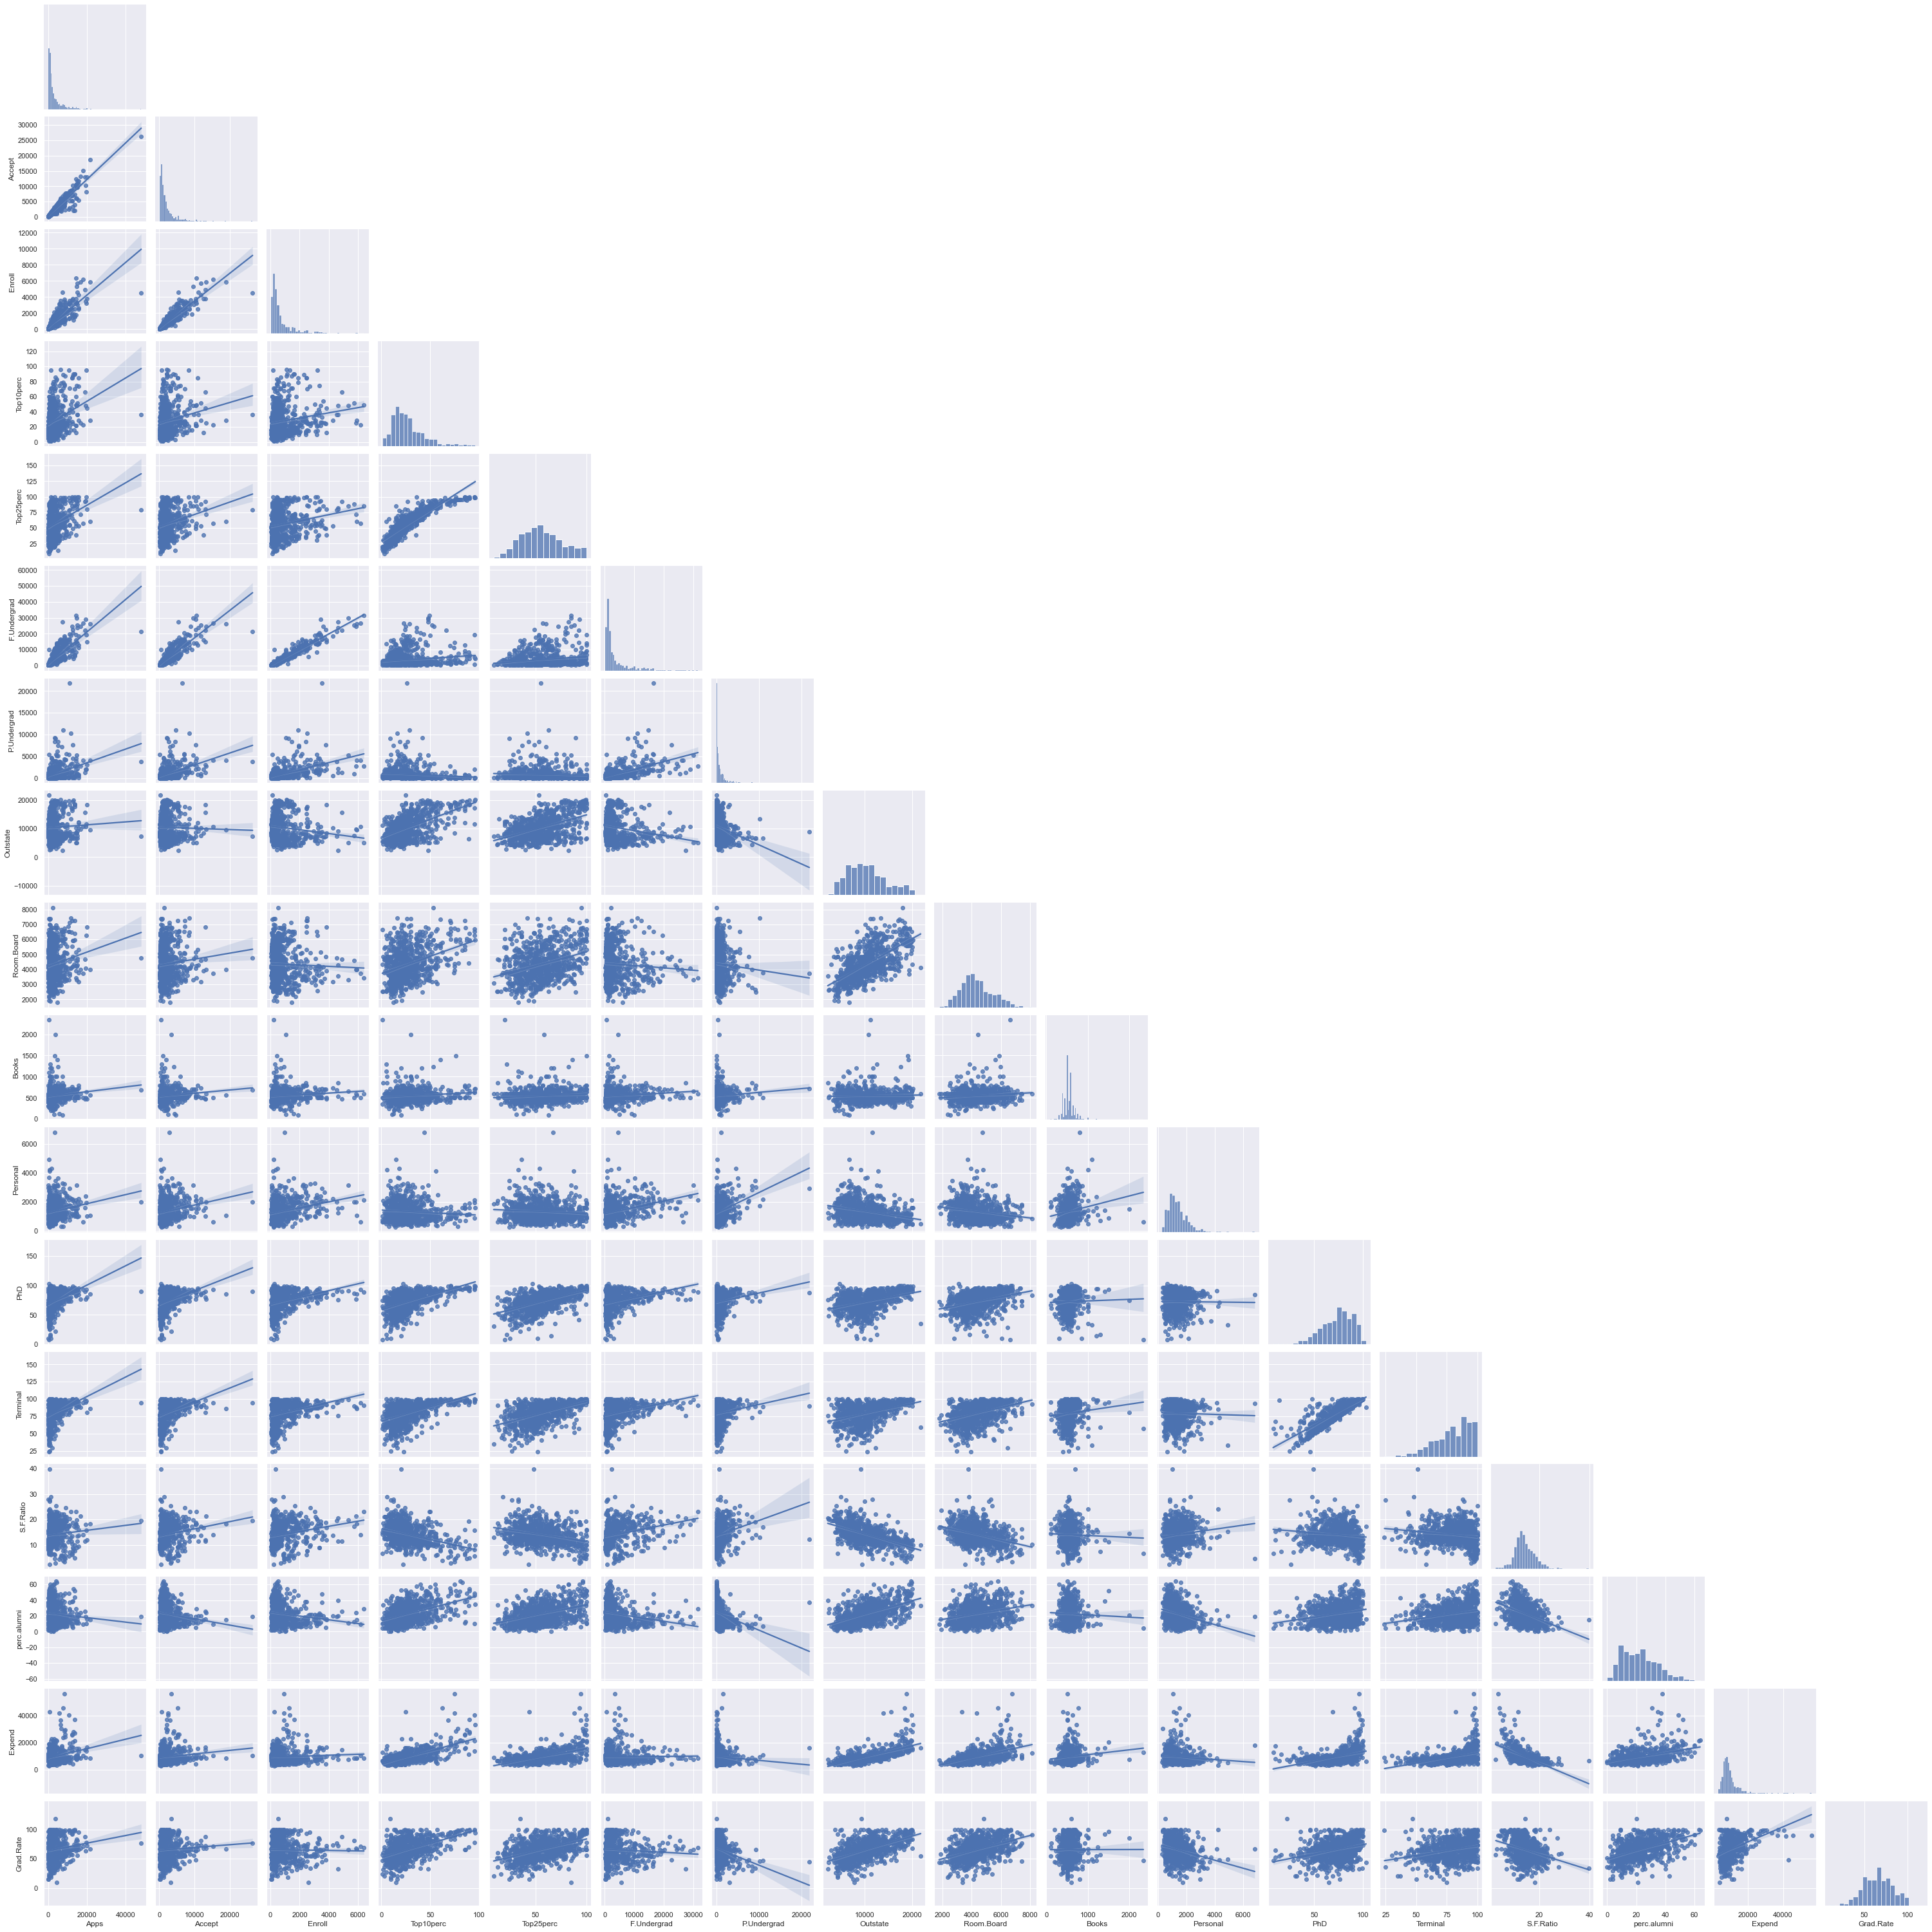

In [43]:
sns.pairplot(df1, kind="reg",corner=True)
plt.show()

In [44]:
df1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<AxesSubplot:>

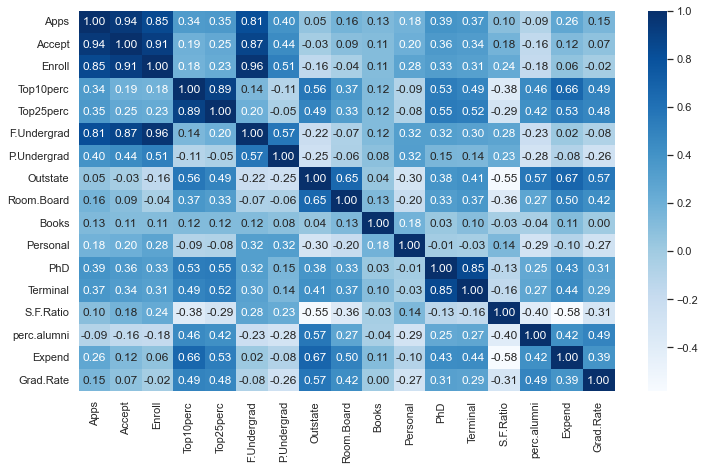

In [45]:
plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='Blues')

In [46]:
df_pca = df1.drop(['Names'], axis = 1)

In [47]:
len(df_pca.columns)

17

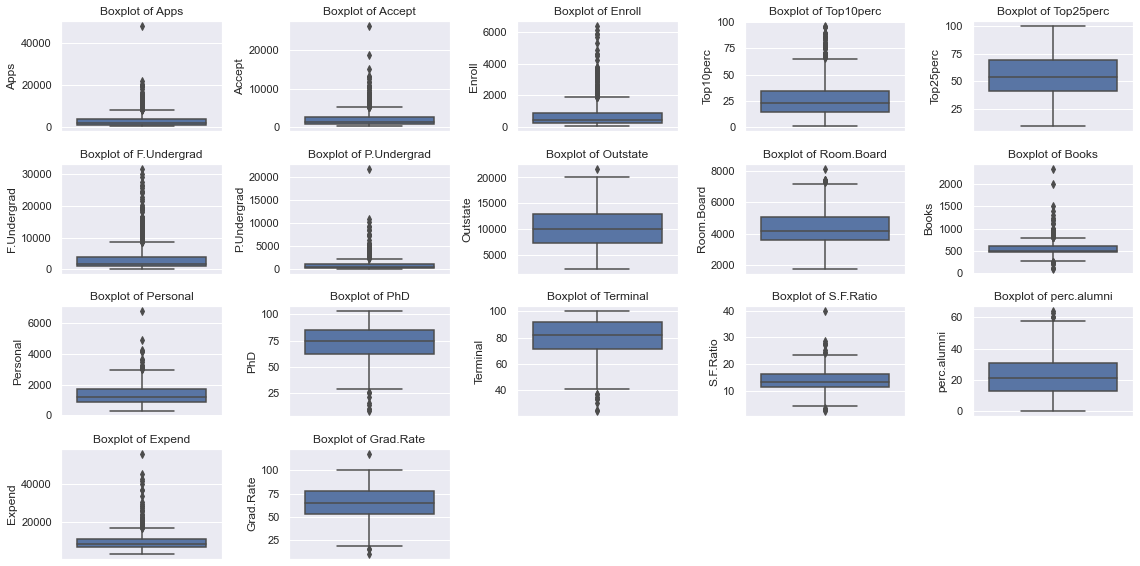

In [48]:
plt.figure(figsize = (16,10))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [49]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


##  Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [50]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [51]:
df_pca_scaled

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


##  Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [52]:
corrMatrix = df_pca_scaled.corr()
print (corrMatrix)

                 Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.33146

<AxesSubplot:>

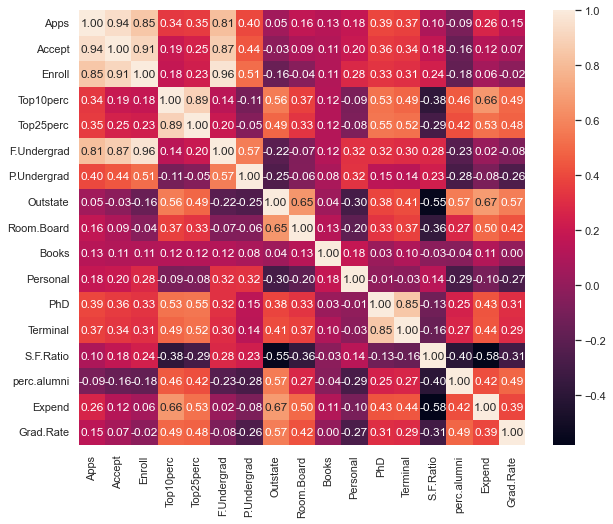

In [53]:
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f')

In [54]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

(11836.962561421795, 0.0)

In [55]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8131251200373505

In [56]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [57]:
pca_transformed

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         1.75239502e-03, -9.31400698e-02,  9.35522023e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.03709803e-01, -5.02556890e-02, -1.74057054e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.25582869e-02, -4.05268301e-03,  3.75875882e-03],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
         6.79013123e-02, -2.32023970e-01, -9.99380421e-02],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         3.53597440e-01,  3.04416200e-01,  3.35104811e-01],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.14873492e-01, -1.17076127e-01, -2.57218339e-03]])

##  Check the dataset for outliers before and after scaling. What insight do you derive here?

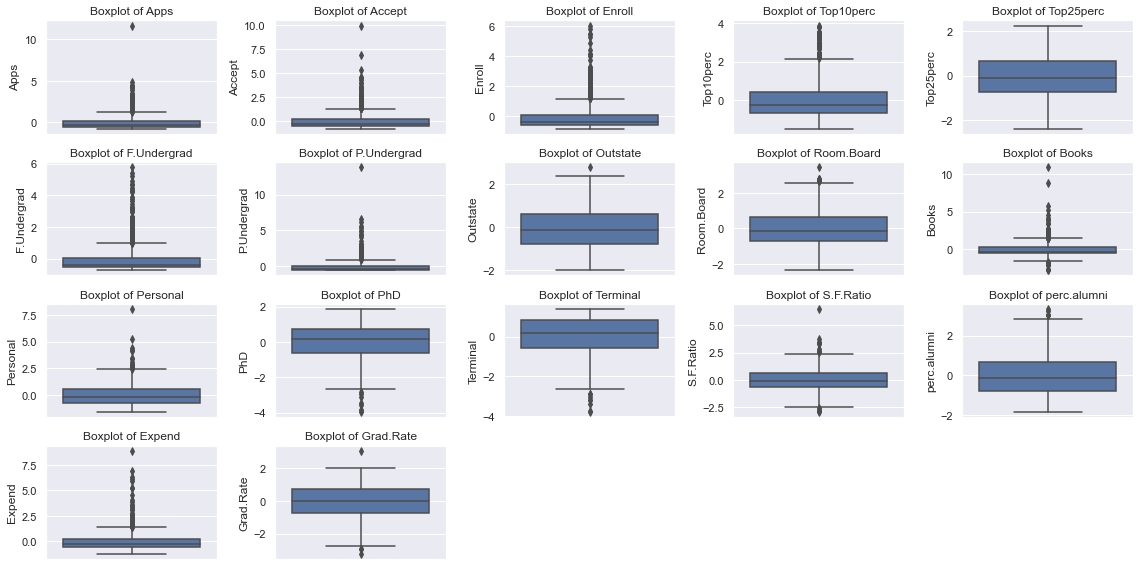

In [58]:
plt.figure(figsize = (16,10))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

##  Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [59]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [60]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

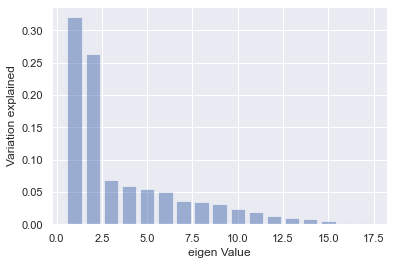

In [61]:
plt.bar(list(range(1,18)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

##  Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [62]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16','PC17'],
                                    index = df_pca_scaled.columns)

In [63]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


##  Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [66]:
df_extracted_loadings.iloc[:,0].round(2)

Apps           0.25
Accept         0.21
Enroll         0.18
Top10perc      0.35
Top25perc      0.34
F.Undergrad    0.15
P.Undergrad    0.03
Outstate       0.29
Room.Board     0.25
Books          0.06
Personal      -0.04
PhD            0.32
Terminal       0.32
S.F.Ratio     -0.18
perc.alumni    0.21
Expend         0.32
Grad.Rate      0.25
Name: PC1, dtype: float64

##  Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [67]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

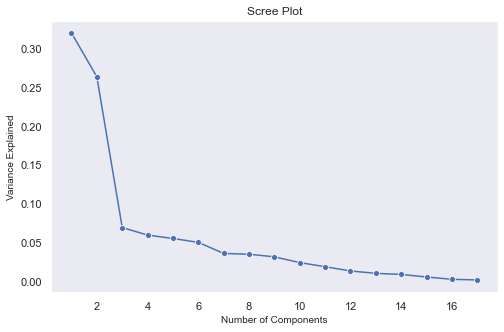

In [68]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [69]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [70]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [71]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055


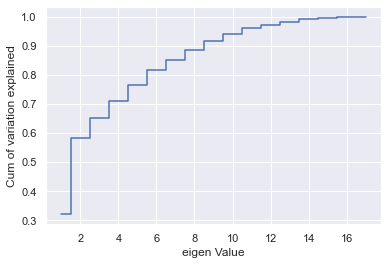

In [72]:
plt.step(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [73]:
pca3 = PCA(n_components=6)
pca3.fit(df_pca_scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(df_pca_scaled)

[[ 0.2487656   0.2076015   0.17630359  0.35427395  0.34400128  0.15464096
   0.0264425   0.29473642  0.24903045  0.06475752 -0.04252854  0.31831287
   0.31705602 -0.17695789  0.20508237  0.31890875  0.25231565]
 [ 0.33159823  0.37211675  0.40372425 -0.08241182 -0.04477866  0.41767377
   0.31508783 -0.24964352 -0.13780888  0.05634184  0.21992922  0.05831132
   0.04642945  0.24666528 -0.24659527 -0.13168986 -0.16924053]
 [-0.0630921  -0.10124906 -0.08298557  0.03505553 -0.02414794 -0.06139298
   0.13968172  0.04659887  0.14896739  0.67741165  0.49972112 -0.12702837
  -0.06603755 -0.2898484  -0.14698927  0.22674398 -0.20806465]
 [ 0.28131053  0.26781735  0.16182677 -0.05154725 -0.10976654  0.10041234
  -0.15855849  0.13129136  0.18499599  0.08708922 -0.23071057 -0.53472483
  -0.51944302 -0.16118949  0.01731422  0.07927349  0.26912907]
 [ 0.00574141  0.05578609 -0.05569364 -0.39543434 -0.42653359 -0.04345436
   0.30238541  0.222532    0.56091947 -0.12728883 -0.22231102  0.14016633
   0.204

In [74]:
Xpca3

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01,
        -9.21749398e-01, -7.43975398e-01, -2.98306081e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00,
         3.58891823e+00,  1.05999661e+00, -1.77137308e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01,
         6.77240527e-01, -3.69613274e-01, -9.60591689e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641697e-04,
         5.43162811e-02, -5.16021117e-01,  4.68014248e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00,
         8.52053995e-01, -9.47754747e-01, -2.06993738e+00],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00,
        -1.08022557e-01, -1.13217594e+00,  8.39893087e-01]])

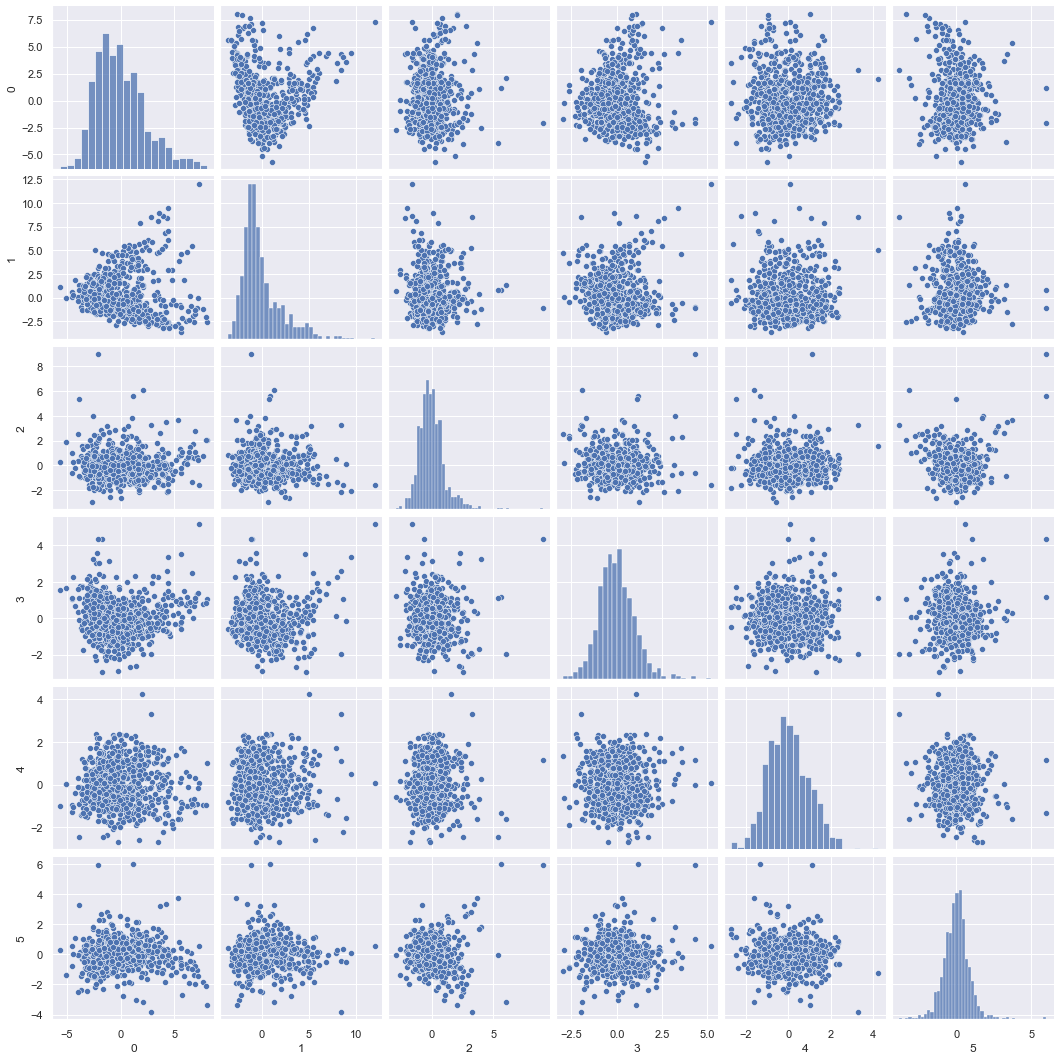

In [75]:
sns.pairplot(pd.DataFrame(Xpca3))

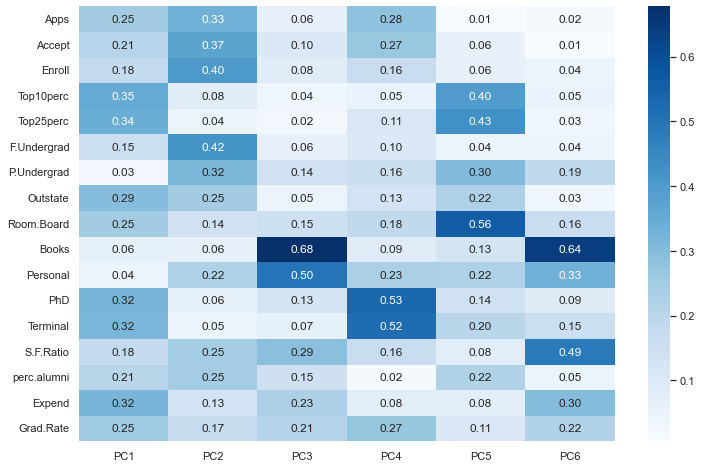

In [76]:
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [77]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055


In [78]:
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-1.592855 0.767334 -0.101074 -0.921749 -0.743975 -0.298306 

In [79]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [80]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918
5,-0.571665,-1.496325,0.024354,0.066944,-0.376261,-0.668343
6,0.241952,-1.506368,0.234194,-1.142024,1.546983,-0.009995
7,1.750474,-1.461412,-1.026589,-0.981184,0.217044,0.222924
8,0.769127,-1.984433,-1.426052,-0.071424,0.586380,-0.655179
9,-2.770721,-0.844611,1.627987,1.705091,-1.019826,-0.794401


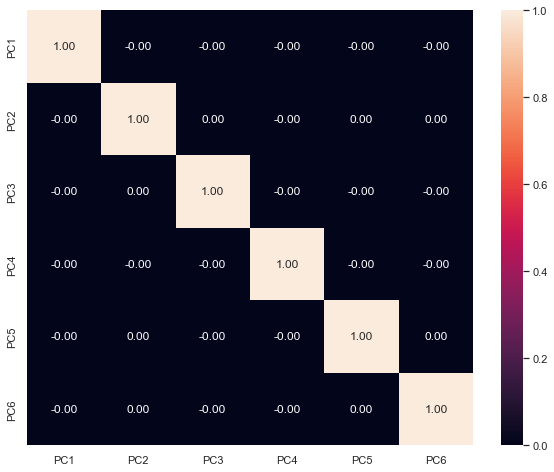

In [81]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');